In [1]:
import numpy as np
import matplotlib.pyplot as plt

from graphqec import RotatedSurfaceCode, ThresholdLAB

In [2]:
rsc = RotatedSurfaceCode(
    distance = 3,
    depolarize1_rate = 0.01,
    depolarize2_rate = 0.01
)

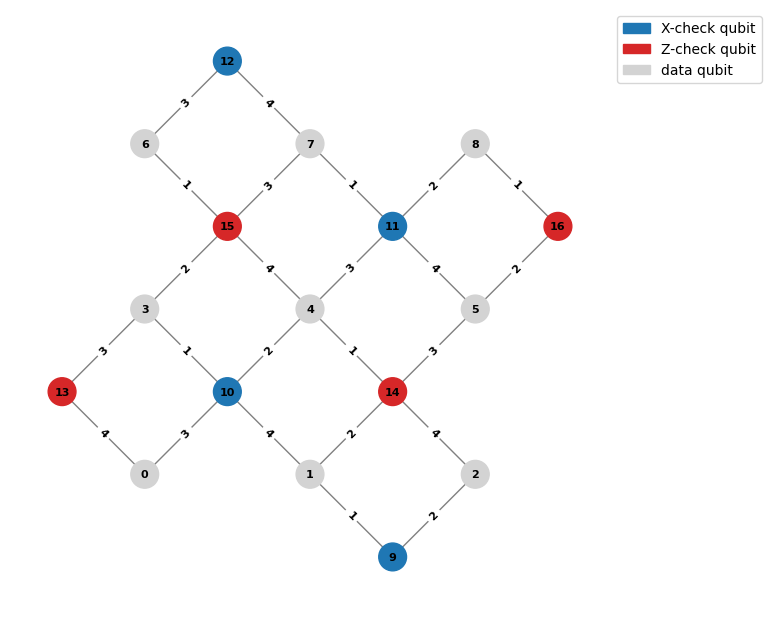

In [3]:
rsc.draw_graph()

In [4]:
rsc.build_memory_circuit(number_of_rounds=2, logic_check="Z")
rsc.memory_circuit.diagram()

q0: -R-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)----------------------------------------------------------------------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)-----------M:rec[16]-DETECTOR:D12=rec[19]*rec[16]*rec[8]------------------OBSERVABLE_INCLUDE:L0*=rec[16]*rec[17]*rec[18]-
                                                                                                                                                                                                                                                                                                                                                          | |                                                         | |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | |                                                         | |
 q1: -R-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------|-|---------------------------------------------------------|-|---------------------------------------------------------X-DEPOLARIZE2(0.01)----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------|-|---------------------------------------------------------|-|---------------------------------------------------------X-DEPOLARIZE2(0.01)----------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)-----------M:rec[17]-DETECTOR:D13=rec[20]*rec[17]*rec[21]*rec[18]*rec[9]-------------------------------------------------
                                                                                                          | |                                                         | |                                                                                                                                                                                 | |                                                         

In [5]:
rsc.build_memory_circuit(number_of_rounds=2, logic_check="X")
rsc.memory_circuit.diagram()

q0: -RX-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)----------------------------------------------------------------------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)-----------MX:rec[16]-DETECTOR:D13=rec[19]*rec[20]*rec[16]*rec[17]*rec[13]-OBSERVABLE_INCLUDE:L0*=rec[16]*rec[19]*rec[22]-
                                                                                                                                                                                                                                                                                                                                                           | |                                                         | |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | |                                                         | |
 q1: -RX-DEPOLARIZE1(0.01)---------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------|-|---------------------------------------------------------|-|---------------------------------------------------------X-DEPOLARIZE2(0.01)--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------X-DEPOLARIZE2(0.01)-----------------------------------------@-DEPOLARIZE2(0.01)-----------------------------------------------------------------------------------------------------------------------------------------------------------------|-|---------------------------------------------------------|-|---------------------------------------------------------X-DEPOLARIZE2(0.01)----------------------------------------------------------------------------------------------------------DEPOLARIZE1(0.01)-----------MX:rec[17]-DETECTOR:D12=rec[17]*rec[18]*rec[12]----------------------------------------------------------------
                                                                                                           | |                                                         | |                                                                                                                                                                                 | |                     

In [ ]:
th = ThresholdLAB(
    distances= [3, 5],
    code=RotatedSurfaceCode,
    error_rates= np.linspace(0, 0.02, 10),
    logic_check='Z'
)

th.collect_stats(num_shots=10**4)

In [ ]:
th.plot_stats(
    x_min = 5e-3, 
    x_max = 2e-2,
    y_min = 1e-3, 
    y_max = 6e-1
)